In [7]:
import sys
sys.path.append('..')

from src.visualization import plot_settings
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('../data/raw/fullpilot1466.csv')
df2 = pd.read_csv('../data/raw/fullpilot13_22.csv')
df3 = pd.read_csv('../data/raw/test/spaceprl(1).csv')

df = df[df.expName.isin(['FullPilot12', 'FullPilot13', 'FullPilot14', ])]
df2 = df2[df2.expName.isin(['FullPilot12', 'FullPilot13'])]
df3 = df3[df3.expName.isin(['FullPilot12_2'])]
#concat df and df3
df = pd.concat([df, df3])

df = df.groupby('prolificID').filter(lambda x: len(x) >= 483)
df2 = df2.groupby('prolificID').filter(lambda x: len(x) >= 483)

df = pd.concat([df, df2])
# df = df.groupby('prolificID').filter(lambda x: len(x) <= 432)
# keep  prolificIDs that are more than 10 characters
df = df[df.prolificID.str.len() > 10]
# show prolificIDs

expName = ['FullPilot12', 'FullPilot13', 'FullPilot14', 'FullPilot12_2']



df['opti_ss'] = ((df.m1 > df.m2) & (df.choice==1)) | ((df.m1 < df.m2) & (df.choice==2))
df['opti_ff'] = ((df.p1 > df.p2) & (df.choice==1)) | ((df.p1 < df.p2) & (df.choice==2))
df['opti_ev'] = ((df.ev1 > df.ev2) & (df.choice==1)) | ((df.ev1 < df.ev2) & (df.choice==2))
df['chosen_p'] = np.where(df.choice == 1, df.p1, df.p2)
df['chosen_m'] = np.where(df.choice == 1, df.m1, df.m2)

df.loc[df.expName=='FullPilot14', 'destroyed'] = 1
df['outcome'] = (df.outcome1 * (df.choice == 1) * df.destroyed) + (df.outcome2 * (df.choice == 2) * df.destroyed)



df = df[df.expName.isin(expName)]
print(f'N = {len(df.prolificID.unique())}')

# remove duplicates and only take first based on prolificID, t, session
df = df.drop_duplicates(subset=['prolificID', 't', 'session'])

# replace all of the above by df
# we have m1, m2 and p1, p2, we need to say what option is riskier (higher variance) 
df['var1'] = df.p1 * (df.m1 - df.ev1)**2 + (1 - df.p1) * (0 - df.ev1)**2

df['var2'] = df.p2 * (df.m2 - df.ev2)**2 + (1 - df.p2) * (0 - df.ev2)**2
df['riskier'] = np.where(df.var1 > df.var2, 1, 2)
df['chose_safe'] = np.where(df.choice != df.riskier, 1, 0)
df['chose_risky'] = np.where(df.choice == df.riskier, 1, 0)



N = 225


In [2]:
dd = df[(df.expName=='FullPilot12_2') & (df.session==3)]
dd

,prolificID,expName,session,t,pair,choice,outcome1,outcome2,choseLeft,op1IsLeft,...,opti_ff,opti_ev,chosen_p,chosen_m,outcome,var1,var2,riskier,chose_safe,chose_risky
130165,58f4d676c8b7eb0001879416,FullPilot12_2,3,0,0.0,2,650,361.0,1,0,...,True,False,0.82,380,361.0,75765.4,21313.6,1,1,0
130167,58f4d676c8b7eb0001879416,FullPilot12_2,3,1,0.0,2,601,358.0,1,0,...,True,True,0.50,380,358.0,40592.8,36100.0,1,1,0
130169,58f4d676c8b7eb0001879416,FullPilot12_2,3,2,-2.0,1,742,297.0,1,1,...,False,True,1.00,720,742.0,0.0,0.0,2,1,0
130171,58f4d676c8b7eb0001879416,FullPilot12_2,3,3,-2.0,1,637,379.0,1,1,...,False,True,1.00,620,637.0,0.0,0.0,2,1,0
130173,58f4d676c8b7eb0001879416,FullPilot12_2,3,4,1.0,2,742,297.0,0,1,...,True,True,0.62,280,297.0,54743.2,18471.2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139411,65cba5290b9dca9291cd76ac,FullPilot12_2,3,167,1.0,1,707,274.0,0,0,...,True,True,0.73,720,707.0,102176.8,11572.0,1,0,1
139414,65cba5290b9dca9291cd76ac,FullPilot12_2,3,168,1.0,2,699,311.0,1,0,...,True,False,0.73,280,0.0,122135.2,15452.8,1,1,0
139417,65cba5290b9dca9291cd76ac,FullPilot12_2,3,169,1.0,1,753,280.0,1,1,...,True,True,0.38,720,0.0,122135.2,15452.8,1,0,1
139420,65cba5290b9dca9291cd76ac,FullPilot12_2,3,170,0.0,2,601,380.0,0,1,...,True,False,0.82,380,0.0,90564.8,21313.6,1,1,0


In [3]:
# count the number of trials per prolificID and per session


In [4]:
dd['delta_ev'] = abs(dd.ev1 - dd.ev2)

# we have m1, m2 and p1, p2, we need to say what option is riskier (higher variance) 
dd['var1'] = dd.p1 * (dd.m1 - dd.ev1)**2 + (1 - dd.p1) * (0 - dd.ev1)**2

dd['var2'] = dd.p2 * (dd.m2 - dd.ev2)**2 + (1 - dd.p2) * (0 - dd.ev2)**2
dd['riskier'] = np.where(dd.var1 > dd.var2, 1, 2)
dd['chose_safe'] = np.where(dd.choice != dd.riskier, 1, 0)
dd['chose_risky'] = np.where(dd.choice == dd.riskier, 1, 0)


dd['below_median_ev'] = dd['delta_ev'] < dd['delta_ev'].median()


C:\Users\garciaba\AppData\Local\Temp\ipykernel_31076\1168946752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['delta_ev'] = abs(dd.ev1 - dd.ev2)
C:\Users\garciaba\AppData\Local\Temp\ipykernel_31076\1168946752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['var1'] = dd.p1 * (dd.m1 - dd.ev1)**2 + (1 - dd.p1) * (0 - dd.ev1)**2
C:\Users\garciaba\AppData\Local\Temp\ipykernel_31076\1168946752.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [5]:
feed

NameError: name 'feed' is not defined

In [16]:
# load risk tests
#select prolificIDs
dd = df[(df.expName=='FullPilot12_2') & (df.session==3) & (df.pair.isin([0,1]))]
pids = dd.prolificID.unique()

# now go get these prolificIDs from the risk tests
dospert = pd.read_csv('../data/raw/test/spaceprl_dospert.csv')
dospert = dospert[dospert.prolificID.isin(pids)]
# general = pd.read_csv('../data/raw/test/spaceprl_general_risk(2).csv')
# general = general[general.prolificID.isin(pids)]
feed = pd.read_csv('../data/raw/test/spaceprl_feedback.csv')
feed = feed[feed.prolificID.isin(pids)]
lot = pd.read_csv('../data/raw/test/spaceprl_risk(1).csv')
lot = lot[lot.prolificID.isin(pids)]

# lot is a holt and laury test with 10 choices (choice_0 to choice_9)
# compute risky choices
lot['risky_choices'] = lot[[f'choice_{i}' for i in range(10)]].sum(axis=1)
lot = lot[['prolificID', 'risky_choices', 'amount']]
# compute dospert risk score as the sum of all columns except prolificID
dospert['risk_d'] = dospert[[f'q{i}' for i in range(0, 30)]].sum(axis=1)

# compute the average of q0 to q5 if the columns exist
# first map Strongly Disagree to 1, Disagree to 2, Neutral to 3, Agree to 4, Strongly Agree to 5
feed = feed.replace({'Strongly Disagree': 5, 'Disagree': 4, 'Neutral': 3, 'Agree': 2, 'Strongly Agree': 1})
# then compute the mean of q0 to q3 if the columns exist
feed['feedback'] = feed[[f'q{i}' for i in [0,1,2,3,4]]].sum(axis=1)
# for participant that have NaN in q3 and q4, take q2 value, for the reste take q3 value
# feed['feedback'] = np.where(feed.q3.isna() & feed.q2.notna(), feed.q2, feed.q3)
# for participant that have NaN in q3 and q2, take mean of q0 and q1 value, for the reste take q0 to q2 value
# feed['feedback'] = np.where(feed.q3.isna() & feed.q2.isna(), feed[[f'q{i}' for i in [0,1]]].mean(axis=1), feed[[f'q{i}' for i in [0,1,2]]].mean(axis=1))
# finally, if feedback is NaN, replace it with the mean of the feedback
# create a new df called risk 
risk = pd.merge(lot, dospert, on='prolificID', how='outer')
risk = pd.merge(risk, feed[['prolificID', 'feedback']], on='prolificID', how='outer')
# add the chose_risky avg from dd to risk
risk = pd.merge(risk, df[df.expName.isin(['FullPilot12_2']) & (df.session==3) & (df.pair.isin([0,1]))].groupby('prolificID').chose_risky.mean().reset_index(), on='prolificID', how='left')
risk = pd.merge(risk, df[df.expName.isin(['FullPilot12_2']) & (df.session==3) & (df.pair.isin([0,1]))].groupby('prolificID').chose_safe.mean().reset_index(), on='prolificID', how='left')
# also add opti_ff
risk = pd.merge(risk, df[df.expName.isin(['FullPilot12_2']) & (df.session==3) & (df.pair.isin([0,1]))].groupby('prolificID').opti_ff.mean().reset_index(), on='prolificID', how='left')
# also add opti_ss
risk = pd.merge(risk, df[df.expName.isin(['FullPilot12_2']) & (df.session==3) & (df.pair.isin([0,1]))].groupby('prolificID').opti_ss.mean().reset_index(), on='prolificID', how='left')

C:\Users\basil\AppData\Local\Temp\ipykernel_1040\523704336.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  feed = feed.replace({'Strongly Disagree': 5, 'Disagree': 4, 'Neutral': 3, 'Agree': 2, 'Strongly Agree': 1})


In [ ]:
lot.amount.mean()

1.8946153846153844

ValueError: array must not contain infs or NaNs

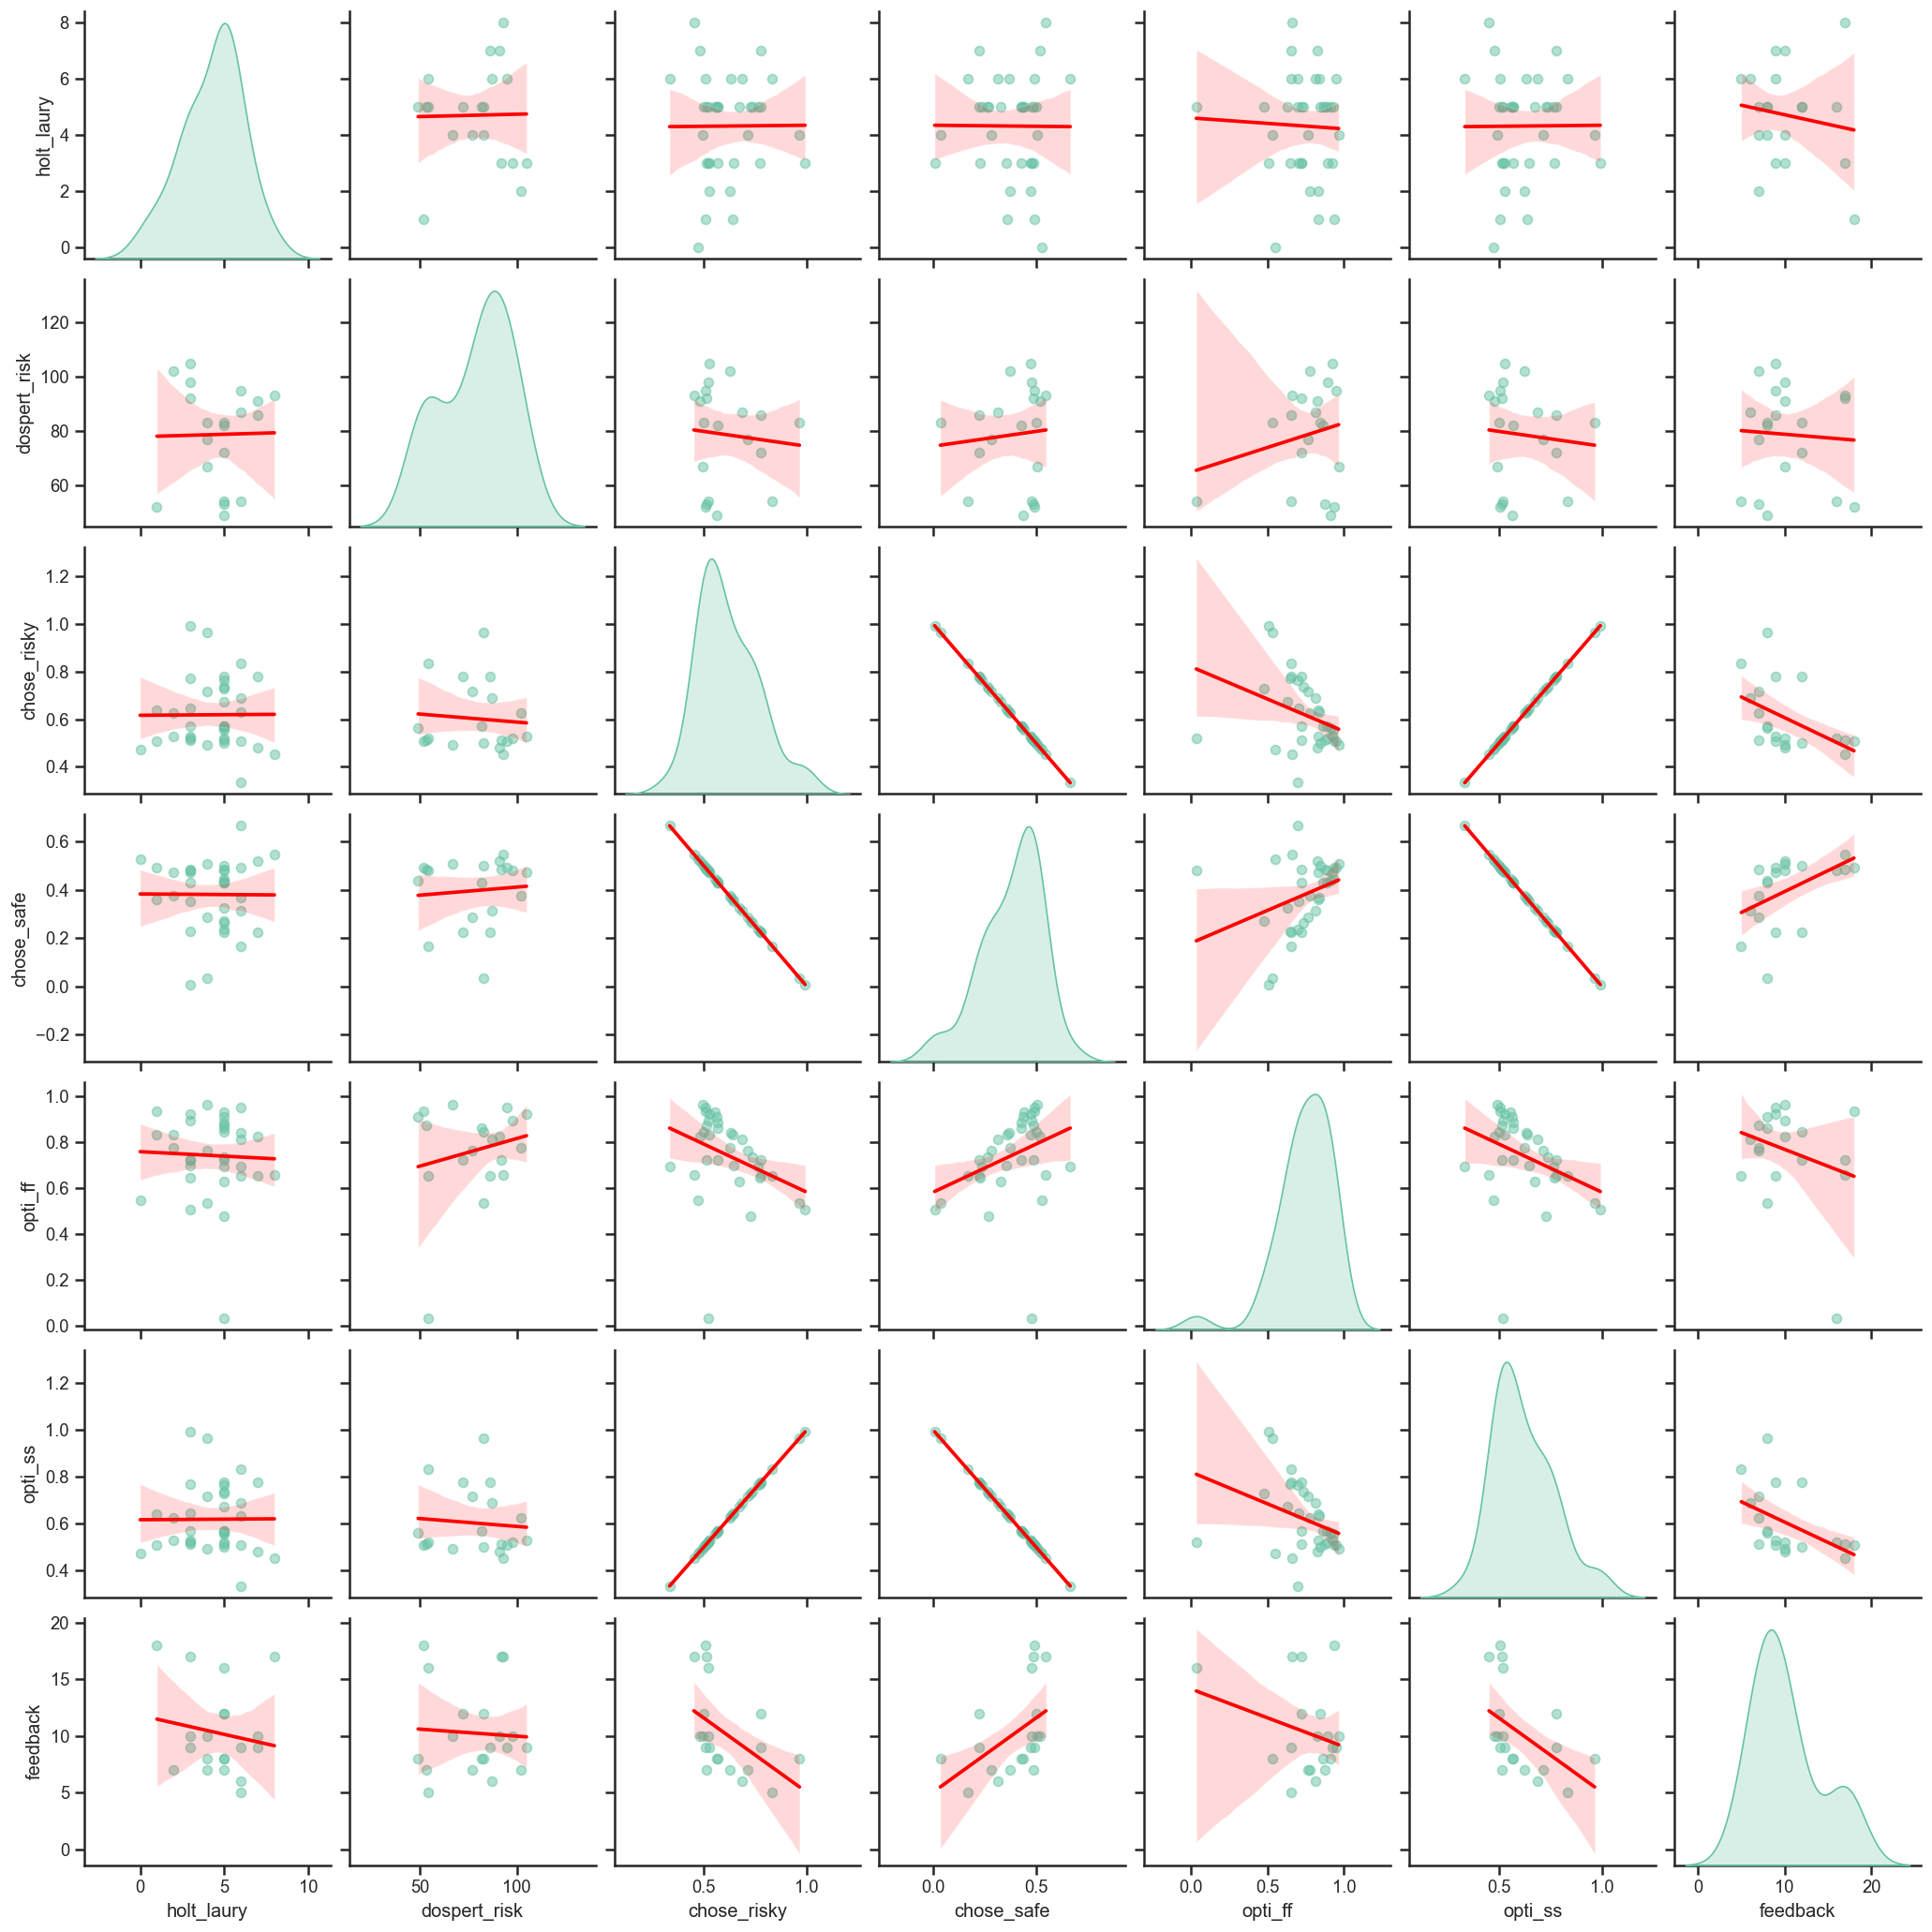

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# do big regplot of all risk measures against chose_risky

#rename risky_choices in holt_laury
risk = risk.rename(columns={'risky_choices': 'holt_laury'})
#rename risk_q to general_risk
# risk = risk.rename(columns={'risk_q': 'general_risk'})
risk = risk.rename(columns={'risk_d': 'dospert_risk'})
variables = ['holt_laury', 'dospert_risk', 'chose_risky', 'chose_safe', 'opti_ff', 'opti_ss', 'feedback']
# we want regression lines for each plot and the correlation coefficient
# show correlation coefficients
import scipy.stats as stats
def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    ax = plt.gca()
    # add stars
    if p < 0.001:
        stars = '***'
    elif p < 0.01:
        stars = '**'
    elif p < 0.05:
        stars = '*'
    else:
        stars = ''
    ax.annotate(f'r = {r:.2f}, p = {p:.2f} {stars}', xy=(.1, .9), xycoords=ax.transAxes)

# we don't want to see after the diagonal, i.e we want to mask the upper triangle
h = sns.pairplot(risk[variables], kind='reg', diag_kind='kde', 
plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha':0.5}}).map_lower(corrfunc)

#remove upper triangle
for i, j in zip(*np.triu_indices_from(h.axes, 1)):
    h.axes[i, j].set_visible(False)


In [ ]:
dd = df[df.expName.isin(['FullPilot12_2']) & (df.session==3) & (df.pair.isin([0,1]))]

# create a new column that is a tuple of (p1, p2)
dd['p1p2'] = list(zip(dd.p1, dd.p2))

dd.groupby('prolificID').p1p2.value_counts()

C:\Users\garciaba\AppData\Local\Temp\ipykernel_27788\1111969520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['p1p2'] = list(zip(dd.p1, dd.p2))


prolificID                p1p2        
57d02ffb596f5d0001df741f  (0.12, 0.18)    2
                          (0.12, 0.27)    2
                          (0.62, 0.38)    2
                          (0.38, 0.88)    2
                          (0.5, 0.12)     2
                                         ..
67858bcf2e9aa77b0e98dbb7  (0.5, 0.82)     2
                          (0.5, 0.88)     2
                          (0.62, 0.12)    2
                          (0.62, 0.18)    2
                          (0.88, 0.82)    2
Name: count, Length: 936, dtype: int64

# check option avg value

In [ ]:
dd.outcome

130165    361.0
130167    358.0
130173    297.0
130175    637.0
130177    631.0
          ...  
136134    361.0
136135      0.0
136136    721.0
136137    720.0
136139      0.0
Name: outcome, Length: 1872, dtype: float64

In [8]:
expName = 'FullPilot12_2'
ms = np.unique(np.array([df[df.expName==expName].name1, df[df.expName==expName].name2]).flatten())
ms

dd = df[(df.expName==expName) & (df.session==0)]
for m in ms:
    outcomes = pd.concat([dd[(dd.name1==m)].outcome1, dd[dd.name2==m].outcome2])
    #check that m1 and m2 correspond to the same mean outcome
    print(m, ':', outcomes.mean(), 'objective mean: ',pd.concat([dd[dd.name1==m].m1, dd[dd.name2==m].m2]).unique())
    # there should be unique mean for each m
    # if m == name1 then it's mean should be m1
    


FFEnemyNeutral : nan objective mean:  []
FFEnemyShipNoColors12 : 381.0286054827175 objective mean:  [380]
FFEnemyShipNocolors1 : 619.8390941597139 objective mean:  [620]
FFEnemyShipNocolors3 : 719.4547619047619 objective mean:  [720]
FFEnemyShipNocolors8 : 279.6666666666667 objective mean:  [280]


C:\Users\basil\AppData\Local\Temp\ipykernel_1040\3604272277.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  outcomes = pd.concat([dd[(dd.name1==m)].outcome1, dd[dd.name2==m].outcome2])


# Check shield destroy p

In [9]:
expName = 'FullPilot12_2'
dd = df[(df.expName==expName) & (df.session==3) & (df.pair.isin([0,1]))]

ps = np.unique(np.array([dd.p1, dd.p2]).flatten())



for p in ps:
    # now is similar except we want to see for each p, if p1 or p2 = p, and if choice = 1 or 2, then show destroy
    destroys = pd.concat([dd[(dd.p1==p) & (dd.choice==1)].destroyed, dd[(dd.p2==p) & (dd.choice==2)].destroyed])
    print(p, ':', destroys.mean())

0.12 : 0.10333333333333333
0.18 : 0.1488673139158576
0.27 : 0.25210084033613445
0.38 : 0.378076062639821
0.5 : 0.5144508670520231
0.62 : 0.6161449752883031
0.73 : 0.7366255144032922
0.82 : 0.8166259168704156
0.88 : 0.8841870824053452


## check n trials per participants and session

In [10]:
df[df.expName=='FullPilot12_2'].groupby(['prolificID', 'session']).size().reset_index(name='counts')

,prolificID,session,counts
0,57d02ffb596f5d0001df741f,0,48
1,57d02ffb596f5d0001df741f,1,48
2,57d02ffb596f5d0001df741f,2,48
3,57d02ffb596f5d0001df741f,3,172
4,57d02ffb596f5d0001df741f,4,172
...,...,...,...
170,680e7ac23ca1dcd92920d90b,0,48
171,680e7ac23ca1dcd92920d90b,1,48
172,680e7ac23ca1dcd92920d90b,2,48
173,680e7ac23ca1dcd92920d90b,3,172


In [11]:
# simulate a random agent choosing randomly among all participants trials

for prolificID, group in df.groupby('prolificID'):
    for trial in range(len(group)):
        choice = np.random.choice([1, 2], size=len(group))
        df.loc[group.index[trial], 'random_choice'] = choice[trial]
df['random_opti_ss'] = ((df.m1 > df.m2) & (df.random_choice==1)) | ((df.m1 < df.m2) & (df.random_choice==2))
df['random_opti_ff'] = ((df.p1 > df.p2) & (df.random_choice==1)) | ((df.p1 < df.p2) & (df.random_choice==2))
df['random_opti_ev'] = ((df.ev1 > df.ev2) & (df.random_choice==1)) | ((df.ev1 < df.ev2) & (df.random_choice==2))


C:\Users\basil\AppData\Local\Temp\ipykernel_1040\3159650058.py:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=new_df_rand, x='type', y='opti', join=False)


NameError: name 'plt' is not defined

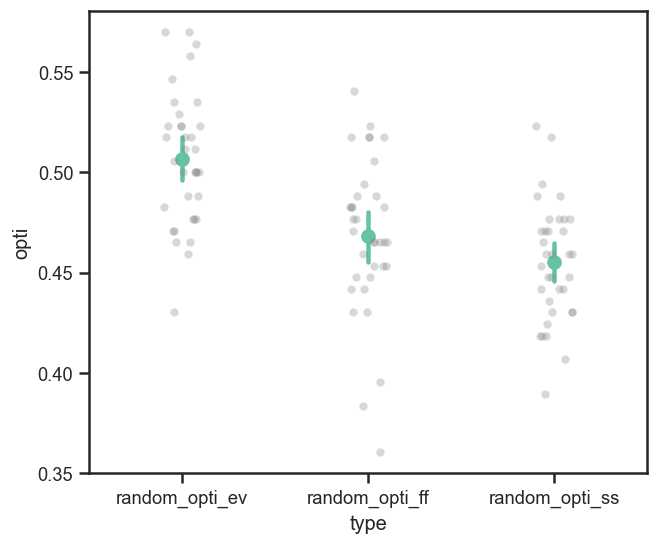

In [12]:
new_df_rand = df[df.expName.isin(['FullPilot12_2'])].melt(id_vars=['prolificID', 't', 'session'], value_vars=['random_opti_ss', 'random_opti_ff', 'random_opti_ev'], var_name='type', value_name='opti')
# only keep session 3
new_df_rand = new_df_rand[new_df_rand.session==3]
new_df_rand = new_df_rand.groupby(['prolificID', 'type']).opti.mean().reset_index()
sns.pointplot(data=new_df_rand, x='type', y='opti', join=False)
sns.stripplot(data=new_df_rand, x='type', y='opti', color='gray', alpha=0.3, jitter=0.1)
plt.axhline(0.5, linestyle='--', color='gray')
plt.ylim(0, 1)

In [23]:

session = 3
expName = ['FullPilot12_2']
df_ = df[(df.session==session) & (df.expName.isin(expName))].groupby(['prolificID'], as_index=False).mean(numeric_only=True)

import scipy.stats as stats

df_['delta'] = df_.opti_ff - df_.opti_ss

df_['opti_ff'] = df_.opti_ff.astype(float)
df_['opti_ss'] = df_.opti_ss.astype(float)
df_['delta'] = df_.delta.astype(float)
df['opti_ff'] = df['opti_ff'].astype(float)
df['opti_ss'] = df['opti_ss'].astype(float)
         
df2 = df[(df.session==session) & (df.expName.isin(expName))]

def get_group2(row):
    opti_ff = df2[df2.prolificID==row.prolificID].opti_ff
    opti_ss = df2[df2.prolificID==row.prolificID].opti_ss
    ttest = stats.ttest_rel(opti_ff, opti_ss)
    p = ttest.pvalue
    t = ttest.statistic
    p_ss = stats.ttest_1samp(opti_ss, 0.5, alternative='greater').pvalue < 0.05 
    p_ff = stats.ttest_1samp(opti_ff, 0.5, alternative='greater').pvalue < 0.05

    if p > 0.05:
        if p_ss and p_ff:
            return 'balanced'
        if p_ss:
            return 'value'
        if p_ff:
            return 'perceptual'
        return 'random'
    
    if t > 0 and p_ff:
        return 'perceptual'
    if t < 0  and p_ss:
        return 'value'

    return 'random'

def get_group(row):
    opti_ff = df2[df2.prolificID==row.prolificID].opti_ff
    opti_ss = df2[df2.prolificID==row.prolificID].opti_ss
    p_ss = stats.ttest_1samp(opti_ss, 0.5, alternative='greater').pvalue < 0.05 
    p_ff = stats.ttest_1samp(opti_ff, 0.5, alternative='greater').pvalue < 0.05

    if p_ss and p_ff:
        return 'combined'
        
    
    if p_ff:
        return 'perceptual'
    if p_ss:
        return 'value'

    return 'random'
    # raise ValueError('unexpected value')

df_['group'] = df_.apply(get_group, axis=1)

df['group'] = df['prolificID'].map(df_.set_index('prolificID')['group'])

# df = df[df.group != 'random']
df[df.expName==expName[0]].groupby('prolificID').group.first().value_counts()

group
perceptual    12
combined       6
value          1
random         1
Name: count, dtype: int64

C:\Users\garciaba\AppData\Local\Temp\ipykernel_31076\829881280.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=new_df, x='type', y='opti', hue='group', join=False)


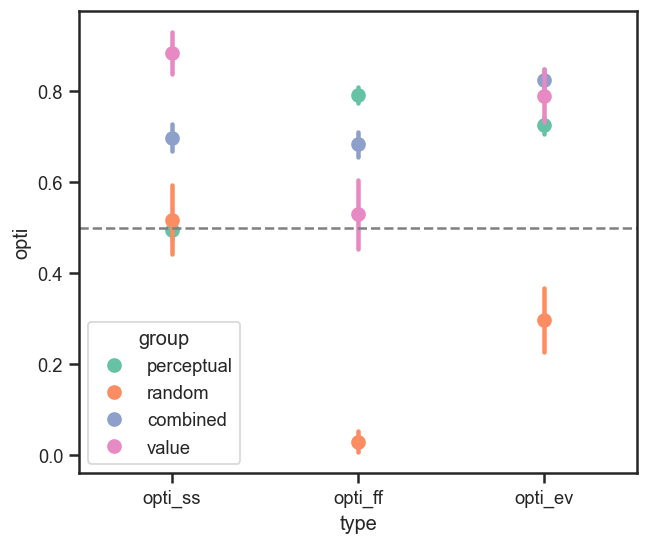

In [63]:
import matplotlib.pyplot as plt
# new df to plot opti_ss and opti_ff side by side
new_df = df[df.expName.isin(['FullPilot12_2', 'FullPilot12'])].melt(id_vars=['prolificID', 't', 'session', 'group', 'p1', 'p2'], value_vars=['opti_ss', 'opti_ff', 'opti_ev'], var_name='type', value_name='opti')
# only keep session 3
new_df = new_df[new_df.session==3]
# new_df = new_df.groupby(['prolificID', 'type', 'group']).opti.mean().eset_index()

sns.pointplot(data=new_df, x='type', y='opti', hue='group', join=False)
# sns.stripplot(data=new_df, x='type', y='opti', color='gray', alpha=0.3, jitter=0.1)
plt.axhline(0.5, linestyle='--', color='gray')

In [56]:
new_df

,prolificID,type,delta_p,opti
0,5484d361fdf99b0379939d5b,opti_ev,0.06,0.777778
1,5484d361fdf99b0379939d5b,opti_ev,0.09,1.0
2,5484d361fdf99b0379939d5b,opti_ev,0.11,0.9
3,5484d361fdf99b0379939d5b,opti_ev,0.12,1.0
4,5484d361fdf99b0379939d5b,opti_ev,0.15,0.8
...,...,...,...,...
4924,67858bcf2e9aa77b0e98dbb7,opti_ss,0.55,0.444444
4925,67858bcf2e9aa77b0e98dbb7,opti_ss,0.61,0.5
4926,67858bcf2e9aa77b0e98dbb7,opti_ss,0.64,0.4
4927,67858bcf2e9aa77b0e98dbb7,opti_ss,0.70,0.5


<Axes: xlabel='delta_p', ylabel='opti'>

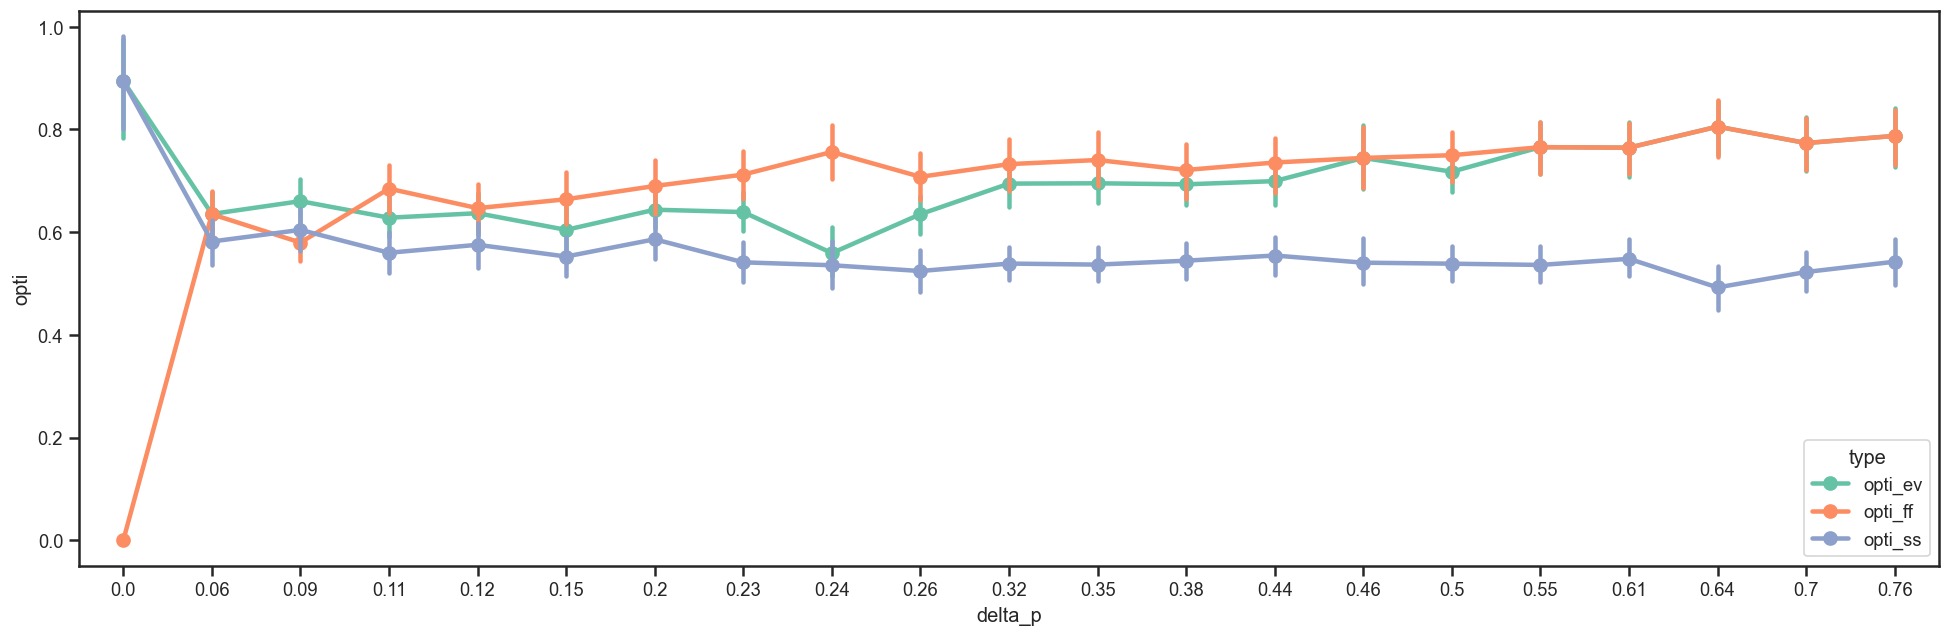

In [64]:
new_df['delta_p'] = round(abs(new_df.p1 - new_df.p2), 4)
new_df = new_df.groupby(['prolificID', 'type', 'delta_p']).opti.mean().reset_index()

plt.figure(figsize=(20, 6))
sns.pointplot(data=new_df, x='delta_p', y='opti', hue='type')


In [59]:
df_

,prolificID,type,delta_p,opti
40,5484d361fdf99b0379939d5b,opti_ss,0.06,0.777778
41,5484d361fdf99b0379939d5b,opti_ss,0.09,0.888889
42,5484d361fdf99b0379939d5b,opti_ss,0.11,0.8
43,5484d361fdf99b0379939d5b,opti_ss,0.12,1.0
44,5484d361fdf99b0379939d5b,opti_ss,0.15,0.7
...,...,...,...,...
4924,67858bcf2e9aa77b0e98dbb7,opti_ss,0.55,0.444444
4925,67858bcf2e9aa77b0e98dbb7,opti_ss,0.61,0.5
4926,67858bcf2e9aa77b0e98dbb7,opti_ss,0.64,0.4
4927,67858bcf2e9aa77b0e98dbb7,opti_ss,0.70,0.5


AttributeError: 'float' object has no attribute 'shape'

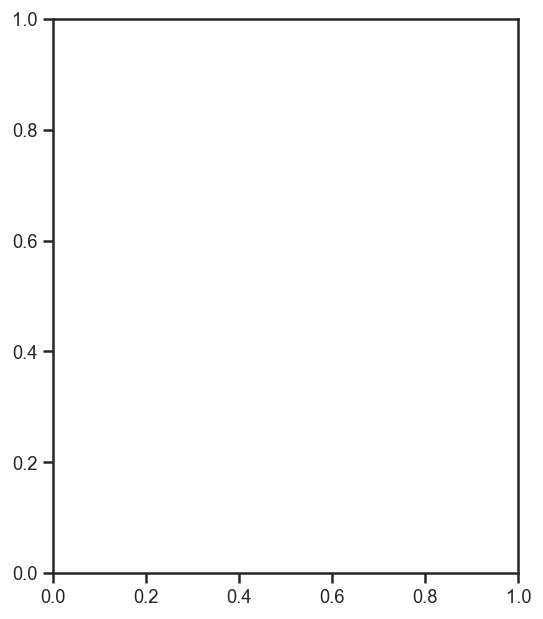

In [75]:
df_ = new_df[new_df.type=='opti_ss'].groupby('delta_p').opti.mean().reset_index()

plt.figure(figsize=(5, 6))
# plot regression line
import scipy.stats as stats
plt.ylim(0, 1)
_= stats.linregress(df_['delta_p'], df_['opti'])
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}\nr = {r_value:.2f}, p = {p_value:.3f}', xy=(.1, .9), xy=plt.gca().transAxes)
sns.regplot(data=df_, x='delta_p', y='opti')


In [ ]:
a = df[(df.prolificID=='57d02ffb596f5d0001df741f') & (df.session==3) & (df.pair.isin([0, 1]))].chose_risky.mean()
b = df[(df.prolificID=='57d02ffb596f5d0001df741f') & (df.session==3) & (df.pair.isin([0, 1]))].opti_ss.mean()

In [ ]:
a, b

(0.7777777777777778, 0.7777777777777778)

In [ ]:
a = risk[(risk.prolificID=='57d02ffb596f5d0001df741f')].opti_ff
b = risk[(risk.prolificID=='57d02ffb596f5d0001df741f')].chose_risky

In [ ]:
a.values[0] == b.values[0]

False

In [5]:
#compute bonuses

conv = 0.00002
bonuses = []
for prolificID, group in df[(df.session.isin([0,1,2,3,4])) & (df.expName=='FullPilot12_2')].groupby('prolificID'):
    total_points = group.outcome.sum()
    bonus = total_points * conv
    lottery_bonus = lot[lot.prolificID==prolificID].amount.values[0]
    print(f'ProlificID: {prolificID}, Total Points: {total_points}, Bonus: £{bonus:.2f}, Bonus with lotteries: £{bonus + lottery_bonus:.2f}')
    bonuses.append(bonus)

print(f'Average Bonus: £{sum(bonuses) / len(bonuses):.2f}')
print(f'Average Total Bonus with lotteries: £{(sum(bonuses) + lot.amount.sum()) / len(bonuses):.2f}')
print(f'Max Bonus: £{max(bonuses):.2f}, Max Total Bonus with lotteries: £{max(bonuses) + lot.amount.max():.2f}')

ProlificID: 57d02ffb596f5d0001df741f, Total Points: 197793.0, Bonus: £3.96, Bonus with lotteries: £6.50
ProlificID: 58f4d676c8b7eb0001879416, Total Points: 186539.0, Bonus: £3.73, Bonus with lotteries: £4.79
ProlificID: 5b16e1a5457ace0001b40d46, Total Points: 206809.0, Bonus: £4.14, Bonus with lotteries: £4.21
ProlificID: 5e0e1f62814bba56ea1a86dd, Total Points: 194732.0, Bonus: £3.89, Bonus with lotteries: £6.43
ProlificID: 5e6ffb8536627f0c4bea9191, Total Points: 207162.0, Bonus: £4.14, Bonus with lotteries: £6.68
ProlificID: 5ebe14249a676b1650b48531, Total Points: 157651.0, Bonus: £3.15, Bonus with lotteries: £4.21
ProlificID: 5fbae54831099083583afff0, Total Points: 195315.0, Bonus: £3.91, Bonus with lotteries: £5.23
ProlificID: 614f571879ee135c5a579e08, Total Points: 207637.0, Bonus: £4.15, Bonus with lotteries: £4.22
ProlificID: 617323e630f3fa36361cb35b, Total Points: 187770.0, Bonus: £3.76, Bonus with lotteries: £5.08
ProlificID: 62a0b34cbcc5987a8fa73c39, Total Points: 204170.0, Bo

In [23]:
lot.amount.mean()

1.6822857142857146

In [19]:
conv = 0.00002
bonuses = []
for prolificID, group in df[(df.session.isin([0,1,2,3,4])) & (df.expName=='FullPilot12_2')].groupby('prolificID'):
    total_points = group.outcome.sum()
    bonus = total_points * conv
    lottery_bonus = lot[lot.prolificID==prolificID].amount.values[0]
    # print(f'ProlificID: {prolificID}, Total Points: {total_points}, Bonus: £{bonus:.2f}, Bonus with lotteries: £{bonus + lottery_bonus:.2f}')
    print(f'{prolificID},{bonus+lottery_bonus:.2f}')
    bonuses.append(bonus+lottery_bonus)



# average bonus+lotterie


57d02ffb596f5d0001df741f,6.50
58f4d676c8b7eb0001879416,4.79
5a53d878acc75b000179e52e,3.95
5b16e1a5457ace0001b40d46,4.21
5c747b0f181ad300113363ed,5.12
5c9b1b5c441b4700179b17b2,4.94
5da8edc60f9c9c0017526948,6.32
5dd5e27fe25acf59990e1adf,4.58
5e0e1f62814bba56ea1a86dd,6.43
5e6ffb8536627f0c4bea9191,6.68
5ebe14249a676b1650b48531,4.21
5fbae54831099083583afff0,5.23
61496cada4d62f06804fa610,5.12
614f571879ee135c5a579e08,4.22
616b5241d8eb9504f10a5cb2,4.83
617323e630f3fa36361cb35b,5.08
62a0b34cbcc5987a8fa73c39,6.62
63bc819194ca25a555eb8fb5,6.41
63d152150ad28a2b24aa507a,4.85
63d71e67dd0fcccd3cc745b0,6.47
646778f0d6b43cbeb4501454,5.13
648746670a6ffb0022fdb933,5.00
650b03136ab3d4c832d98b71,5.10
654bc148c95bca00d541ec33,6.38
65cba5290b9dca9291cd76ac,5.68
667ae31217cd77ff1091dcab,6.37
66881fbe723bc57d75a2c268,5.81
668d3b9862f5a356423ded45,6.13
66b68e2b2c21a7ed557cf866,6.42
66e9236f775eae67be04229d,4.47
66f59c766e7e22e1f90d08f6,5.26
6711e09a6906af2fa5b782bd,6.13
67858bcf2e9aa77b0e98dbb7,5.19
678f6e1f6a

In [ ]:
def convert_usd_to_gbp_with_inflation(usd_2002_value):
    """
    Converts a USD value from 2002 to its equivalent GBP value in 2025,
    accounting for inflation and exchange rate.
    """
    # --- CPI Data (from BLS) ---
    cpi_2002 = 179.9
    cpi_may_2025 = 321.465 # Latest available CPI for 2025 at time of calculation

    # --- Exchange Rate (approximate as of July 2025) ---
    usd_to_gbp_exchange_rate = 0.73 # 1 USD = 0.73 GBP

    # Step 1: Adjust for inflation (2002 USD to 2025 USD)
    inflation_factor = cpi_may_2025 / cpi_2002
    usd_2025_value = usd_2002_value * inflation_factor

    # Step 2: Convert 2025 USD to 2025 GBP
    gbp_2025_value = usd_2025_value * usd_to_gbp_exchange_rate

    return gbp_2025_value

# Original USD values from the problem
original_usd_values = [2.00, 1.60, 3.85, 0.10]

print("Verifying USD 2002 to GBP 2025 conversion with inflation:")
for usd_val in original_usd_values:
    converted_gbp = convert_usd_to_gbp_with_inflation(usd_val)
    print(f"${usd_val:.2f} (2002 USD) -> £{converted_gbp:.2f} (2025 GBP)")

print("\nThese values should match the 'with inflation' results provided earlier.")

Verifying USD 2002 to GBP 2025 conversion with inflation:
$2.00 (2002 USD) -> £2.61 (2025 GBP)
$1.60 (2002 USD) -> £2.09 (2025 GBP)
$3.85 (2002 USD) -> £5.02 (2025 GBP)
$0.10 (2002 USD) -> £0.13 (2025 GBP)

These values should match the 'with inflation' results provided earlier.


0.2029993192097764


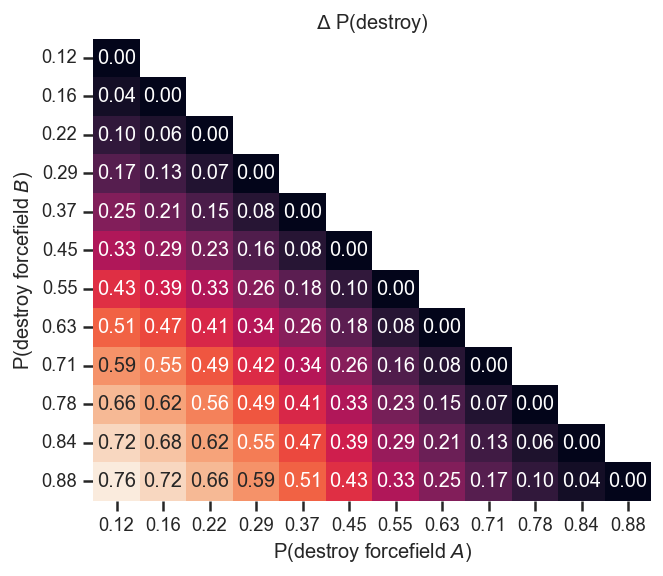

In [ ]:
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

values = [0.07692308, 0.15384615, 0.23076923, 0.30769231,
          0.38461538, 0.46153846, 0.53846154, 0.61538462, 0.69230769,
          0.76923077, 0.84615385, 0.92307692]

slope = 2
# logistic function
logistic = lambda x: 1/(1+np.exp(-slope*x))

p = logistic(np.linspace(-1, 1, 12)).round(2)

# Compute all possible deltas as np matrix
all_deltas = np.empty((len(p), len(p)))
for i in range(len(p)):
    for j in range(len(p)):
        all_deltas[i, j] = abs(p[j] - p[i])

# plot deltas in heattmap 
# set x and y using values as labels
# hide half of the heatmap
mask = np.zeros_like(all_deltas)
mask[np.triu_indices_from(mask)] = True
# but keep matrix diagonal
mask[np.diag_indices_from(mask)] = False
sns.heatmap(np.array(all_deltas), cbar=False, xticklabels=p, yticklabels=p, annot=True, fmt='.2f', mask=mask)
# sns.heatmap(np.array(all_deltas), cmap='RdBu_r', cbar=False, xticklabels=p, yticklabels=p, annot=True, fmt='.2f')
# Sort deltas in descending order
# sorted_deltas = sorted(all_deltas, reverse=True)
# print("All Deltas:")
# for delta in all_deltas:
    # print(delta)
# ylabel 45 degree rotation
plt.yticks(rotation=0)
plt.title('$\Delta$ P(destroy)')
plt.xlabel('P(destroy forcefield $A$)')
plt.ylabel('P(destroy forcefield $B$)')
all_deltas = np.array(all_deltas).flatten()
print(np.std((all_deltas)[all_deltas != 0]))


* New pairs (to update)

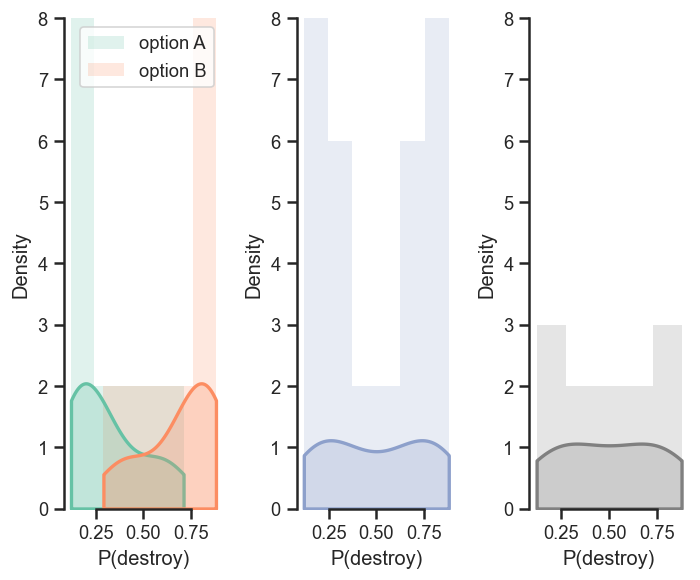

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import src.visualization.plot_settings



x = [(0.16, 0.29),
 (0.71, 0.84),
 (0.22, 0.37),
 (0.63, 0.78),
 (0.55, 0.78),
 (0.22, 0.45),
 (0.37, 0.63),
 (0.55, 0.88),
 (0.12, 0.45),
 (0.29, 0.71),
 (0.16, 0.63),
 (0.37, 0.84),
 (0.12, 0.71),
 (0.29, 0.88),
 (0.16, 0.84),
 (0.12, 0.88)]


x = np.array(x)

# plot hist of x

plt.subplot(1, 3, 1)
sns.histplot(x[:,0],label='option A', color='C0', edgecolor='none', alpha=.2)
sns.histplot(x[:,1], label='option B', color='C1', edgecolor='none', alpha=.2)
sns.kdeplot(x[:,0], color='C0', lw=2, fill=True, alpha=0.25, cut=0)
sns.kdeplot(x[:,1], color='C1', lw=2, fill=True, alpha=0.25, cut=0)
plt.ylabel('Density')
plt.ylim(0, 8)
plt.legend()
sns.despine(trim=True)
plt.xlabel('P(destroy)')

plt.subplot(1, 3, 3)
sns.kdeplot(np.unique(x.flatten()), color='grey', lw=2, fill=True, alpha=0.25, cut=0)
sns.histplot(np.unique(x.flatten()), label='original dist', color='grey', edgecolor='none', alpha=.20)
plt.ylim(0, 8)
sns.despine(trim=True)
plt.xlabel('P(destroy)')

plt.subplot(1, 3, 2)
sns.kdeplot(x.flatten(), color='C2', lw=2, fill=True, alpha=0.25, cut=0)
sns.histplot(x.flatten(), label='pooled', color='C2', edgecolor='none', alpha=.20)
sns.despine(trim=True)
plt.ylim(0, 8)
plt.xlabel('P(destroy)')
plt.tight_layout()

In [ ]:
%pip install matplotlib_venn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\garciaba\.pyenv\pyenv-win\versions\3.9.12\python.exe -m pip install --upgrade pip' command.


In [ ]:
from ptitprince import PtitPrince as pt
sns.set_style('ticks')
plt.figure(figsize=(8,3), dpi=300)
pt.RainCloud(data=[x[:, 0], x[:, 1], x.flatten(), np.unique(x.flatten())], width_viol=.7, 
             width_box=.1, dodge=True,  bw=.4,  alpha=0.5, linewidth=0, point_size=7, palette=['C0', 'C1', 'C2', 'grey'])
plt.ylim(0, 1)
plt.ylabel('P(destroy)')
plt.xlabel('')
plt.xticks([0, 1, 2, 3], ['paired A', 'paired B', 'paired (pooled)', 'original'])

ModuleNotFoundError: No module named 'ptitprince'